In [1]:
import torch
import torch.nn
import argoverse
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/home/cmh/anaconda3/envs/argoverse/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from argoverse.map_representation.map_api import ArgoverseMap
am = ArgoverseMap()

In [3]:
laneid_map = {}
city_halluc_bbox_table, city_halluc_tableidx_to_laneid_map = am.build_hallucinated_lane_bbox_index()
for key in city_halluc_tableidx_to_laneid_map['PIT']:
    laneid_map[city_halluc_tableidx_to_laneid_map['PIT'][key]] = key
# print(laneid_map[9604252])
# am.draw_lane(9605254,'PIT')

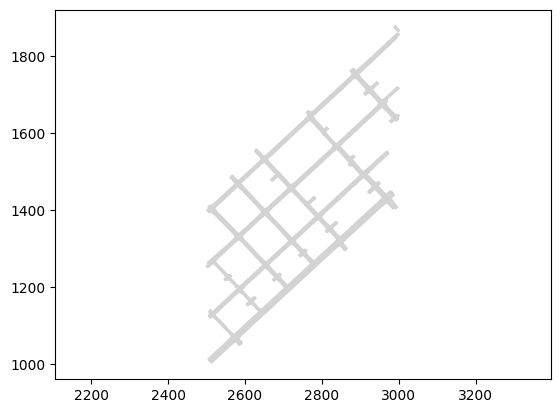

In [4]:
# 自己实现的根据center_line的x坐标范围筛选laneid的方法
for key in laneid_map:
    center_line = am.get_lane_segment_centerline(key, 'PIT')
    if np.min(center_line, axis=0)[0]>2500 and np.max(center_line, axis=0)[0] < 3000:
        am.draw_lane(key,'PIT')

In [6]:
vectormap = np.load('./data/vector_map/PIT_vectormap.npy', 'r')

FileNotFoundError: [Errno 2] No such file or directory: './data/vector_map/PIT_vectormap.npy'

In [ ]:
plt.figure()
plt.xlim(2940, 2980)
plt.ylim(1390, 1460)
for i in range(vectormap.shape[0]):
    if(vectormap[i][0] > 2900 and vectormap[i][0] < 3000 and vectormap[i][1]>1350 and vectormap[i][1]<1500):
        plt.arrow(vectormap[i][0], vectormap[i][1], vectormap[i][2]-vectormap[i][0], vectormap[i][3]-vectormap[i][1],
                 length_includes_head = True,head_width = 0.25,head_length = 0.5)
plt.show()

: 

In [ ]:
plt.figure()
# plt.xlim(2940, 2980)
# plt.ylim(1390, 1460)
plt.xlim(2960, 2975)
plt.ylim(1415, 1440)
for i in range(vectormap.shape[0]):
    if(vectormap[i][0] > 2900 and vectormap[i][0] < 3000 and vectormap[i][1]>1350 and vectormap[i][1]<1500):
        plt.arrow(vectormap[i][0], vectormap[i][1], vectormap[i][2]-vectormap[i][0], vectormap[i][3]-vectormap[i][1],
                 length_includes_head = True,head_width = 0.3,head_length = 0.6)
plt.show()

: 

In [ ]:
from argoverse.data_loading.argoverse_forecasting_loader import ArgoverseForecastingLoader
afl = ArgoverseForecastingLoader("./data/forecasting_dataset/val/")
seq_path = afl.seq_list[7]
data = afl.get(seq_path).seq_df
data = data[data['OBJECT_TYPE'] == 'AGENT']
data.head()

: 

In [ ]:
afl.seq_list[7]

: 

In [ ]:
plt.figure()
plt.xlim(1945, 2000)
plt.ylim(635, 685)
for i in range(vectormap.shape[0]):
    if(vectormap[i][0] > 1945 and vectormap[i][0] < 2000 and vectormap[i][1]>635 and vectormap[i][1]<685):
        plt.arrow(vectormap[i][0], vectormap[i][1], vectormap[i][2]-vectormap[i][0], vectormap[i][3]-vectormap[i][1],
                 length_includes_head = True,head_width = 0.25,head_length = 0.5)

plt.show()

: 

In [ ]:
plt.figure()
plt.xlim(1945, 1957)
plt.ylim(635, 660)
flag = True
num = 0
predict = np.array([[1953.75, 644.51], [1954.50, 644.69], [1952.71, 645.75], [1952.51, 645.82], [1952.48, 645.12], \
                    [1952.76, 643.49], [1952.72, 642.96], [1954.32, 642.38], [1952.87, 641.72]])
for i in range(vectormap.shape[0]):
    if(vectormap[i][0] > 1945 and vectormap[i][0] < 1957 and vectormap[i][1]>635 and vectormap[i][1]<660):
        plt.arrow(vectormap[i][0], vectormap[i][1], vectormap[i][2]-vectormap[i][0], vectormap[i][3]-vectormap[i][1],
                 length_includes_head = True,head_width = 0.25,head_length = 0.5)
for _, row in data.iterrows():
    if num < 20:
        num = num + 1
        continue
    if num >= 37:
        break
    num = num + 1
    if flag:
        xlast = row['X']
        ylast = row['Y']
        flag = False
        continue
    plt.arrow(xlast, ylast, row['X']-xlast, row['Y']-ylast, fc='b', ec='b',
             length_includes_head = True,head_width = 0.25,head_length = 0.5)
    if num <= 30:
        plt.arrow(xlast, ylast, row['X']-xlast, row['Y']-ylast, fc='r', ec='r',
             length_includes_head = True,head_width = 0.25,head_length = 0.5)
    if num == 31:
        plt.arrow(xlast, ylast, predict[0,0]-xlast, predict[0,1]-ylast, fc='r', ec='r',
     length_includes_head = True,head_width = 0.25,head_length = 0.5)
    startpoint = np.array([xlast, ylast])
    endpoint = np.array([row['X'], row['Y']])
    xlast = row['X']
    ylast = row['Y']
for i in range(8):
    plt.arrow(predict[i,0], predict[i,1], predict[i+1,0]-predict[i,0], predict[i+1,1]-predict[i,1], fc='r', ec='r',
             length_includes_head = True,head_width = 0.25,head_length = 0.5)
plt.show()

: 

: 